### Real world phenomenon



In [1]:
# First thing I will do is import the libraries I will need to inspect this dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random
from numpy.random import default_rng
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly import subplots
import gc
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (20,10) #sets the plots size
sns.set_theme(style="ticks") # user preferred style for sns plots
import datetime
from pandas_profiling import ProfileReport

Objectives in this stimulation data project:

- Decide on what dataset we want to analyse and stimulate.
- Data preprocessing.
- Exploration of the dataset.
- Conclusions on the data.
- Communicating the results to the reader.


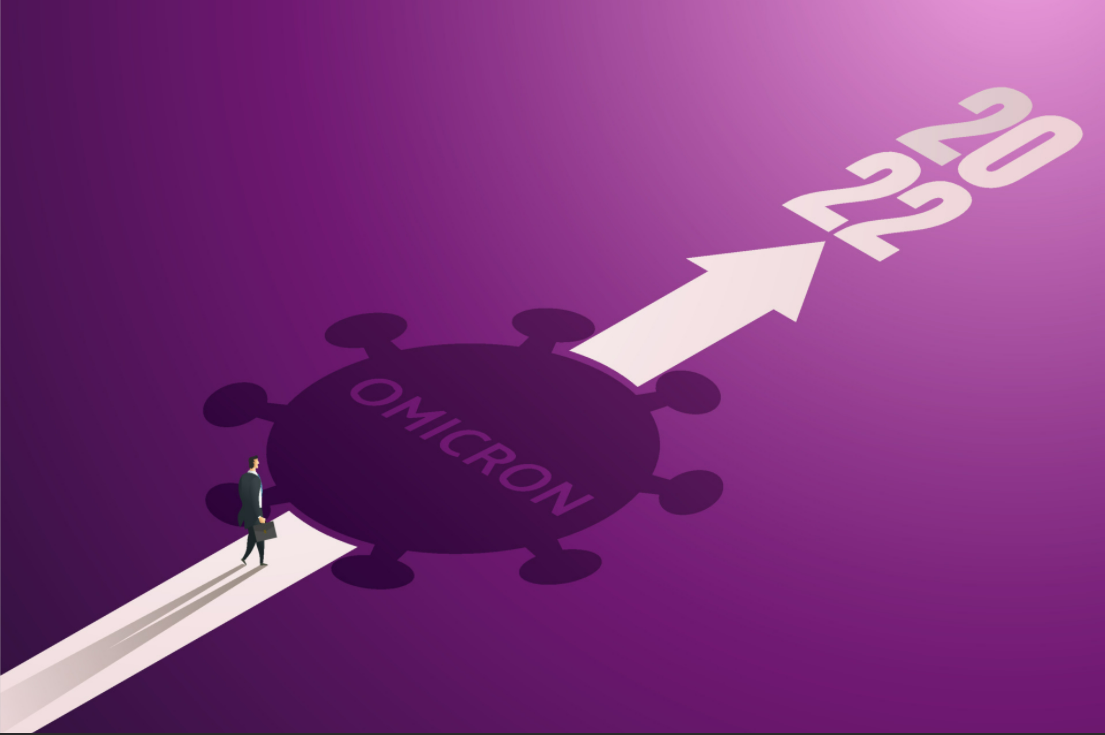

I have decided to work on a data report which is the ongoing Covid situation. Specifically in Ireland over the last three months. I have downloaded a dataset from data.gov.ie [Covid Dataset](https://data.gov.ie/dataset/covid-19-hpsc-detailed-statistics-profile?package_type=dataset) which I will work on now and look at some of the variables available on this dataset. [Image](https://www.bing.com/images/search?view=detailV2&ccid=8K2tlISM&id=9F47C58E852DD7A3AECED335404B8B75006BB653&thid=OIF.WVZk0Vb8jwm0hcViuYCeQw&mediaurl=https%3a%2f%2fstatic.vecteezy.com%2fti%2fgratis-vektor%2fp3%2f4916522-businessmen-meet-icon-omicron-covid-19-on-business-path-arrow-in-2022-vektor.jpg&cdnurl=https%3a%2f%2fth.bing.com%2fth%2fid%2fR.f0adad94848c58dd8d1c22bad1cc5db6%3frik%3d%26pid%3dImgRaw%26r%3d0&exph=1280&expw=1920&q=Omicron+Symbol&simid=6946789330386&FORM=IRPRST&ck=595664D156FC8F09B485C562B9809E43&selectedIndex=51&ajaxhist=0&ajaxserp=0)

In [2]:
df = pd.read_csv('COVID_19Report.csv', nrows=106)

In [3]:
df.tail(10)

Date  ConfirmedCovidCases  TotalConfirmedCovidCases  \
96   27/11/2021                 4791                    556319   
97   28/11/2021                 3735                    560054   
98   29/11/2021                 4607                    564657   
99   30/11/2021                 5471                    570115   
100  01/12/2021                 3793                    573905   
101  02/12/2021                 4163                    578064   
102  03/12/2021                 5419                    583472   
103  04/12/2021                 5622                    589094   
104  05/12/2021                 5156                    594250   
105  06/12/2021                 2950                    597161   

     ConfirmedCovidDeaths  TotalCovidDeaths  CovidCasesConfirmed  \
96                    NaN              5652               551470   
97                    NaN              5652               556255   
98                    NaN              5652               559989   
99                    NaN              5652               564594   
100                  55.0              5707               570062   
101                   NaN              5707               573849   
102                   NaN              5707               578008   
103                   NaN              5707               583420   
104                   NaN              5707               589036   
105                   NaN              5707               594187   

     HospitalisedCovidCases  DailyHosp  RequiringICUCovidCases  DailyICU  ...  \
96                    20461         54                    2199         3  ...   
97                    20515         26                    2202         1  ...   
98                    20541         14                    2203         1  ...   
99                    20555         42                    2204         2  ...   
100                   20597         45                    2206         1  ...   
101                   20642         56                    2207         1  ...   
102                   20698         48                    2208         1  ...   
103                   20746         34                    2209         0  ...   
104                   20780          9                    2209         1  ...   
105                   20789          6                    2210         0  ...   

     D65-74H  75-84Hosp  D75-84H  85upHosp  D85upH  DailyH    Male  Dmale  \
96        12       4067        7      2597       1      54  269825   2392   
97         2       4074        3      2598       2      26  272217   1864   
98         2       4077        4      2600       0      14  274081   2321   
99         7       4081        9      2600       3      42  276402   2685   
100        4       4090        7      2603       3      45  279087   1869   
101        7       4097       13      2606       2      56  280956   2038   
102       10       4110        7      2608       3      48  282994   2690   
103        8       4117        5      2611       2      34  285684   2701   
104        1       4122        0      2613       0       9  288385   2498   
105        1       4122        1      2613       0       6  290883   1456   

     Female  Dfemale  
96   281411     2386  
97   283797     1864  
98   285661     2282  
99   287943     2780  
100  290723     1911  
101  292634     2114  
102  294748     2714  
103  297462     2907  
104  300369     2645  
105  303014     1486  

[10 rows x 37 columns]

In [4]:
df.describe()

ConfirmedCovidCases  TotalConfirmedCovidCases  ConfirmedCovidDeaths  \
count           106.000000                106.000000             15.000000   
mean           2477.113208             432144.981132             42.200000   
std            1363.239973              72273.235293             17.660286   
min             892.000000             338707.000000             18.000000   
25%            1413.250000             374449.000000             28.000000   
50%            1894.500000             410600.500000             43.000000   
75%            3619.250000             480104.000000             55.500000   
max            5959.000000             597161.000000             74.000000   

       TotalCovidDeaths  CovidCasesConfirmed  HospitalisedCovidCases  \
count        106.000000           106.000000              106.000000   
mean        5352.188679        429317.594340            18304.613208   
std          198.525906         71427.667102             1413.151679   
min         5074.000000        335195.000000            16096.000000   
25%         5179.000000        372964.750000            17097.750000   
50%         5306.000000        408767.500000            18150.500000   
75%         5547.500000        476926.250000            19468.000000   
max         5707.000000        594187.000000            20789.000000   

        DailyHosp  RequiringICUCovidCases    DailyICU  \
count  106.000000              106.000000  106.000000   
mean    44.330189             1970.358491    4.443396   
std     20.255380              148.082550    2.852168   
min      6.000000             1739.000000    0.000000   
25%     29.000000             1850.250000    2.250000   
50%     44.500000             1956.000000    4.000000   
75%     57.750000             2101.000000    6.000000   
max    100.000000             2210.000000   13.000000   

       HealthcareWorkersCovidCases  ...     D65-74H    75-84Hosp     D75-84H  \
count                   106.000000  ...  106.000000   106.000000  106.000000   
mean                  34822.566038  ...    7.783019  3695.556604    7.509434   
std                    2263.463949  ...    4.820600   246.462557    4.557036   
min                   31336.000000  ...    1.000000  3327.000000    0.000000   
25%                   32861.000000  ...    4.000000  3477.000000    4.000000   
50%                   34427.500000  ...    7.000000  3664.000000    7.000000   
75%                   36908.500000  ...   10.000000  3908.250000   11.000000   
max                   38616.000000  ...   23.000000  4122.000000   19.000000   

          85upHosp      D85upH      DailyH           Male        Dmale  \
count   106.000000  106.000000  106.000000     106.000000   106.000000   
mean   2386.556604    4.433962   44.330189  209538.650943  1219.037736   
std     149.373682    3.219047   20.255380   35210.948227   705.419712   
min    2143.000000    0.000000    6.000000  163121.000000   236.000000   
25%    2252.250000    2.000000   29.000000  181828.750000   676.000000   
50%    2378.000000    4.000000   44.500000  199368.500000   910.500000   
75%    2524.500000    7.000000   57.750000  232754.250000  1825.000000   
max    2613.000000   14.000000  100.000000  290883.000000  2926.000000   

              Female      Dfemale  
count     106.000000   106.000000  
mean   219672.547170  1249.764151  
std     36147.802469   719.426260  
min    172025.000000   258.000000  
25%    191084.000000   706.000000  
50%    209328.500000   931.000000  
75%    244022.250000  1829.250000  
max    303014.000000  3022.000000  

[8 rows x 36 columns]

In [5]:
df.sum()

Date                           23/08/202124/08/202125/08/202126/08/202127/08/...
ConfirmedCovidCases                                                       262574
TotalConfirmedCovidCases                                                45807368
ConfirmedCovidDeaths                                                       633.0
TotalCovidDeaths                                                          567332
CovidCasesConfirmed                                                     45507665
HospitalisedCovidCases                                                   1940289
DailyHosp                                                                   4699
RequiringICUCovidCases                                                    208858
DailyICU                                                                     471
HealthcareWorkersCovidCases                                              3691192
DailyHealth                                                                 7280
0-5Hosp                     

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         106 non-null    object 
 1   ConfirmedCovidCases          106 non-null    int64  
 2   TotalConfirmedCovidCases     106 non-null    int64  
 3   ConfirmedCovidDeaths         15 non-null     float64
 4   TotalCovidDeaths             106 non-null    int64  
 5   CovidCasesConfirmed          106 non-null    int64  
 6   HospitalisedCovidCases       106 non-null    int64  
 7   DailyHosp                    106 non-null    int64  
 8   RequiringICUCovidCases       106 non-null    int64  
 9   DailyICU                     106 non-null    int64  
 10  HealthcareWorkersCovidCases  106 non-null    int64  
 11  DailyHealth                  106 non-null    int64  
 12  0-5Hosp                      106 non-null    int64  
 13  D0-5H               

In [7]:
pd.to_datetime(df['Date'])

0     2021-08-23
1     2021-08-24
2     2021-08-25
3     2021-08-26
4     2021-08-27
         ...    
101   2021-02-12
102   2021-03-12
103   2021-04-12
104   2021-05-12
105   2021-06-12
Name: Date, Length: 106, dtype: datetime64[ns]

In [8]:
#https://web.microsoftstream.com/video/a3c46038-b110-4356-98d8-b0afaa8ec259?referrer=https:%2F%2Flearnonline.gmit.ie%2F
df['datetime']=pd.to_datetime(df['Date'], dayfirst=True)

In [9]:
df['datetime']

0     2021-08-23
1     2021-08-24
2     2021-08-25
3     2021-08-26
4     2021-08-27
         ...    
101   2021-12-02
102   2021-12-03
103   2021-12-04
104   2021-12-05
105   2021-12-06
Name: datetime, Length: 106, dtype: datetime64[ns]

In [92]:
%matplotlib inline 
plt.rcParams['figure.figsize'] = [10, 7]
TotalDailyCovidCases = sns.scatterplot(x="datetime", y="ConfirmedCovidCases", size="ConfirmedCovidCases", sizes=(1, 50), alpha=.8, data=df[0:], color='r')
plt.title('Daily Covid Cases 23-08-21 to 12-06-21', fontsize=20)
TotalDailyCovidCases

<AxesSubplot:title={'center':'Daily Covid Cases 23-08-21 to 12-06-21'}, xlabel='datetime', ylabel='ConfirmedCovidCases'>

In [95]:
%matplotlib inline 
plt.rcParams['figure.figsize'] = [10, 7]
TotalDailyCovidCases = sns.scatterplot(x="datetime", y="ConfirmedCovidDeaths", size="ConfirmedCovidDeaths", sizes=(1, 100), alpha=.8, data=df[0:], color='b')
plt.title('Covid Deaths 23-08-21 to 12-06-21', fontsize=20)
TotalDailyCovidCases

<AxesSubplot:title={'center':'Covid Deaths 23-08-21 to 12-06-21'}, xlabel='datetime', ylabel='ConfirmedCovidDeaths'>

<AxesSubplot:title={'center':'ICU Admission 23-08-21 to 12-06-21'}, xlabel='datetime', ylabel='DailyICU'>

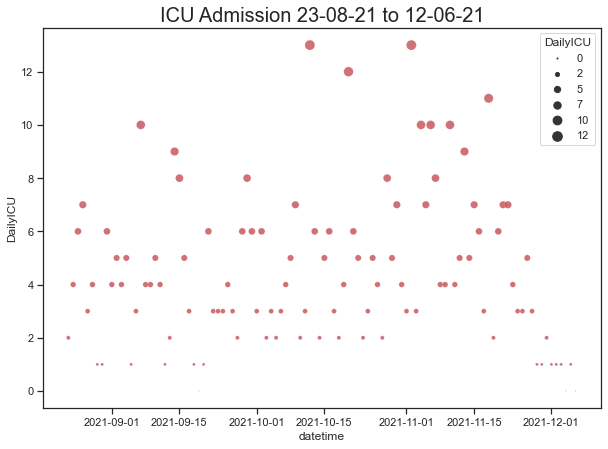

In [96]:
%matplotlib inline 
plt.rcParams['figure.figsize'] = [10, 7]
TotalDailyCovidCases = sns.scatterplot(x="datetime", y="DailyICU", size="DailyICU", sizes=(1, 100), alpha=.8, data=df[0:], color='r')
plt.title('ICU Admission 23-08-21 to 12-06-21', fontsize=20)
TotalDailyCovidCases

In [12]:
#Lets simulate some dates for the datetime 
#simdates=pd.date_range('23/08/2021', periods=106, freq='D')
#simdates
simdates=pd.date_range('23/08/2021', periods=106, freq='D')
simdates

DatetimeIndex(['2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-28', '2021-08-29', '2021-08-30',
               '2021-08-31', '2021-09-01',
               ...
               '2021-11-27', '2021-11-28', '2021-11-29', '2021-11-30',
               '2021-12-01', '2021-12-02', '2021-12-03', '2021-12-04',
               '2021-12-05', '2021-12-06'],
              dtype='datetime64[ns]', length=106, freq='D')

In [13]:
#lets simulate some data that might reflect the numbers over the last 106 days. The mean in the df is 2477 and total amount of cases in the last 106 days was 262574
rng= default_rng(12345)
simcases= rng.integers(5959, size = 106)
simcases

array([4166, 1354, 4699, 1887, 1216, 4751, 3829, 4029, 5890, 2330, 5002,
       1983, 3381, 3565, 1270, 1112, 1365, 4008, 3655, 5612, 4207, 1479,
       5451, 5654, 4364, 3976,  778,  571, 1586, 2632,  431, 5282, 2824,
       4156, 1266, 1945,  691, 4373, 4613, 1311, 4260,  486, 2333,  952,
       4433, 2026, 2821, 2772, 2833, 1587, 3325, 4861, 2971, 1151,  145,
        771,  485,  546,  729, 3566, 4809, 5093, 3893, 3585, 1976, 5553,
       3817, 4318, 4373, 5128, 4186, 5537, 3226, 3254, 1496, 5587, 3295,
       2949, 1885, 1631, 3773, 2692, 3384, 3962, 5357, 1971, 4061, 5383,
       2734, 1531, 1730, 2025, 3753, 1542, 4999, 2118,  385,   29,  149,
       3745, 2066, 1682, 3640,  405, 3225, 3675], dtype=int64)

In [14]:
simcases.sum()

311354

In [15]:
df.describe()

ConfirmedCovidCases  TotalConfirmedCovidCases  ConfirmedCovidDeaths  \
count           106.000000                106.000000             15.000000   
mean           2477.113208             432144.981132             42.200000   
std            1363.239973              72273.235293             17.660286   
min             892.000000             338707.000000             18.000000   
25%            1413.250000             374449.000000             28.000000   
50%            1894.500000             410600.500000             43.000000   
75%            3619.250000             480104.000000             55.500000   
max            5959.000000             597161.000000             74.000000   

       TotalCovidDeaths  CovidCasesConfirmed  HospitalisedCovidCases  \
count        106.000000           106.000000              106.000000   
mean        5352.188679        429317.594340            18304.613208   
std          198.525906         71427.667102             1413.151679   
min         5074.000000        335195.000000            16096.000000   
25%         5179.000000        372964.750000            17097.750000   
50%         5306.000000        408767.500000            18150.500000   
75%         5547.500000        476926.250000            19468.000000   
max         5707.000000        594187.000000            20789.000000   

        DailyHosp  RequiringICUCovidCases    DailyICU  \
count  106.000000              106.000000  106.000000   
mean    44.330189             1970.358491    4.443396   
std     20.255380              148.082550    2.852168   
min      6.000000             1739.000000    0.000000   
25%     29.000000             1850.250000    2.250000   
50%     44.500000             1956.000000    4.000000   
75%     57.750000             2101.000000    6.000000   
max    100.000000             2210.000000   13.000000   

       HealthcareWorkersCovidCases  ...     D65-74H    75-84Hosp     D75-84H  \
count                   106.000000  ...  106.000000   106.000000  106.000000   
mean                  34822.566038  ...    7.783019  3695.556604    7.509434   
std                    2263.463949  ...    4.820600   246.462557    4.557036   
min                   31336.000000  ...    1.000000  3327.000000    0.000000   
25%                   32861.000000  ...    4.000000  3477.000000    4.000000   
50%                   34427.500000  ...    7.000000  3664.000000    7.000000   
75%                   36908.500000  ...   10.000000  3908.250000   11.000000   
max                   38616.000000  ...   23.000000  4122.000000   19.000000   

          85upHosp      D85upH      DailyH           Male        Dmale  \
count   106.000000  106.000000  106.000000     106.000000   106.000000   
mean   2386.556604    4.433962   44.330189  209538.650943  1219.037736   
std     149.373682    3.219047   20.255380   35210.948227   705.419712   
min    2143.000000    0.000000    6.000000  163121.000000   236.000000   
25%    2252.250000    2.000000   29.000000  181828.750000   676.000000   
50%    2378.000000    4.000000   44.500000  199368.500000   910.500000   
75%    2524.500000    7.000000   57.750000  232754.250000  1825.000000   
max    2613.000000   14.000000  100.000000  290883.000000  2926.000000   

              Female      Dfemale  
count     106.000000   106.000000  
mean   219672.547170  1249.764151  
std     36147.802469   719.426260  
min    172025.000000   258.000000  
25%    191084.000000   706.000000  
50%    209328.500000   931.000000  
75%    244022.250000  1829.250000  
max    303014.000000  3022.000000  

[8 rows x 36 columns]

In [16]:
# the max cases any day in our covid set was 5959. Generate numbers for 106 days with the rng.intergers function to see the random selection in this range 
simcases2 = [rng.integers(0,6000) for i in range(106)]
simcases2


[190,
 1057,
 2341,
 1826,
 5703,
 2645,
 3881,
 901,
 4838,
 1307,
 4604,
 2845,
 2440,
 2858,
 3215,
 1531,
 728,
 1785,
 5934,
 1674,
 4005,
 1563,
 5027,
 2896,
 3403,
 1271,
 3646,
 2973,
 4275,
 1477,
 3653,
 5030,
 2804,
 1080,
 436,
 5172,
 3030,
 1069,
 1762,
 4503,
 2223,
 3666,
 4872,
 1254,
 5159,
 4559,
 2008,
 1495,
 2066,
 513,
 2574,
 3708,
 4629,
 3221,
 648,
 3807,
 591,
 1046,
 5771,
 1488,
 3451,
 4108,
 4927,
 485,
 5043,
 5250,
 4159,
 2572,
 1607,
 3710,
 4036,
 1878,
 4089,
 1073,
 1536,
 58,
 1747,
 1260,
 4932,
 5220,
 5229,
 5836,
 3773,
 2650,
 3493,
 2272,
 2840,
 1655,
 4158,
 5796,
 952,
 349,
 2269,
 2452,
 2472,
 1011,
 983,
 1440,
 3471,
 4680,
 2837,
 1222,
 2560,
 3312,
 5612,
 2201]

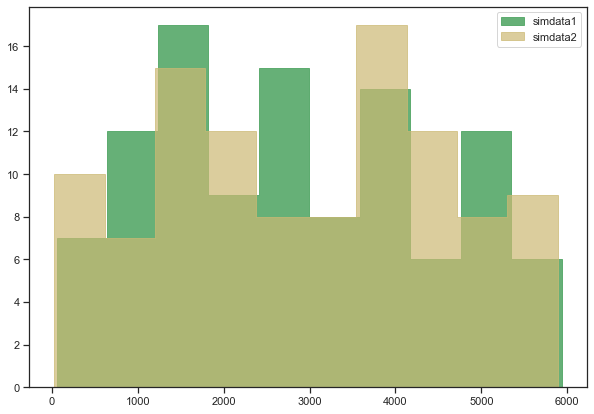

In [99]:
x = simcases2
y = simcases
plt.hist(x, label='simdata1', histtype='step', stacked=True,fill=True, alpha=0.9,color='g')
plt.hist(y, label='simdata2', histtype='step', stacked=True,fill=True, alpha=0.7,color='y')
plt.legend()
plt.show()

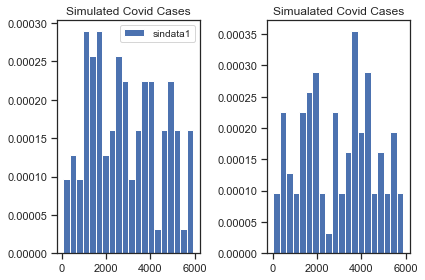

In [18]:
n_bins = 20
x = simcases2
y = simcases
fig, (ax0, ax1)=plt.subplots(nrows=1, ncols=2)

ax0.hist(x, n_bins, density=True, histtype='bar', label='sindata1')
ax0.legend(prop={'size': 10})
ax0.set_title('Simulated Covid Cases')

ax1.hist(y, n_bins, density=True, histtype='bar', label='sindata2')
ax1.set_title(' Covid Cases')

fig.tight_layout()
plt.show()

In [19]:
ts= pd.DataFrame(simcases,simdates, columns=['DailyCovidCasesSimulated'])

Now we will compare the simulated covid case numbers that we have generated using the numpy random package and compare it with the actual numbers from our dataset over the same time period. As we can see from the graph below the random package has overestimated the numbers. This is due to the fact that case numbers in the actual data have increased during the later phase of the dates selected while they have remained constant in random generation. 

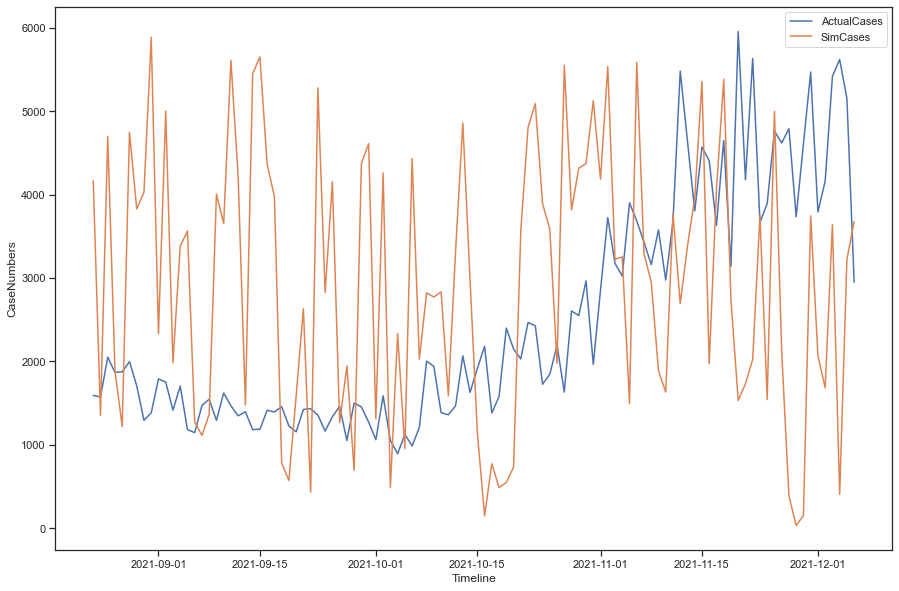

In [20]:
#ref https://pythonguides.com/python-plot-multiple-lines/
# Define data values
fig= plt.figure(figsize=(15,10))
x = df['datetime']
y = df['ConfirmedCovidCases']
z = ts['DailyCovidCasesSimulated']

# Plot a simple line chart
plt.plot(x, y, label='ActualCases')

# Plot another line on the same chart/graph
plt.plot(x, z, label = 'SimCases')

plt.xlabel('Timeline')
plt.ylabel('CaseNumbers')
plt.legend()
plt.show()


In [21]:
# create a df with the weekly deaths using the transform function on pandas
dfCD = pd.read_csv('COVID_19Report.csv', nrows=106)
dfCD['ConfirmedCovidDeaths'] = dfCD['ConfirmedCovidDeaths'].fillna(0)

In [22]:
dfCD['datetime'] = pd.to_datetime(dfCD['Date'])
dfCD['datetime']=pd.to_datetime(dfCD['Date'], dayfirst=True)
dfCD = dfCD.set_index(['datetime'])


In [23]:
#https://flutterq.com/solved-typeerror-only-valid-with-datetimeindex-timedeltaindex-or-periodindex-but-got-an-instance-of-rangeindex-and-i-cant-figure-out-why/
#https://www.geeksforgeeks.org/python-pandas-dataframe-resample/
#https://www.statology.org/python-resample-time-series/
weekly_resampled_data= pd.DataFrame()
weekly_resampled_data = dfCD.ConfirmedCovidDeaths.resample('W-WED').sum()
weekly_resampled_data.columns='ConfirmedCovidDeaths'
weekly_resampled_data.head(10)

datetime
2021-08-25    18.0
2021-09-01    20.0
2021-09-08    43.0
2021-09-15    24.0
2021-09-22    30.0
2021-09-29    40.0
2021-10-06    31.0
2021-10-13    26.0
2021-10-20    63.0
2021-10-27    67.0
Freq: W-WED, Name: ConfirmedCovidDeaths, dtype: float64

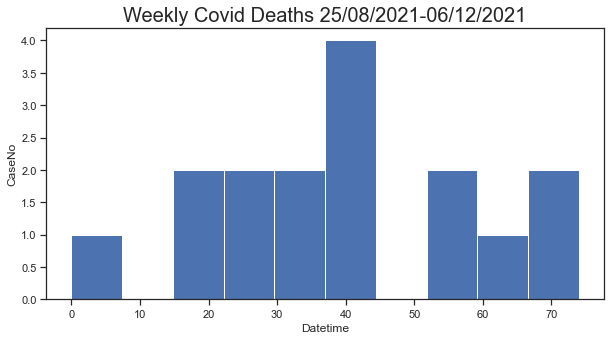

In [24]:
fig= plt.figure(figsize=(10,5))
plt.hist(weekly_resampled_data)
plt.title('Weekly Covid Deaths 25/08/2021-06/12/2021' ,fontsize=20)
plt.xlabel('Datetime')
plt.ylabel('CaseNo')
plt.legend
plt.show()

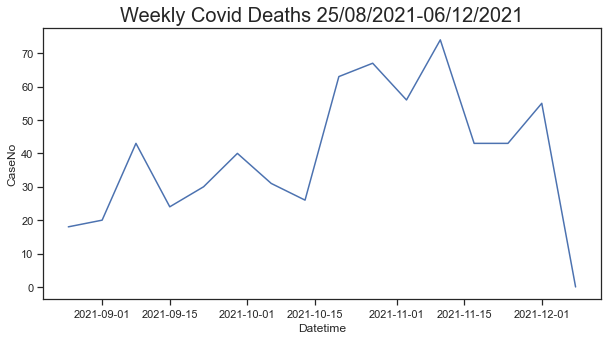

In [25]:
fig= plt.figure(figsize=(10,5))
plt.plot(weekly_resampled_data)
plt.title('Weekly Covid Deaths 25/08/2021-06/12/2021' ,fontsize=20)
plt.xlabel('Datetime')
plt.ylabel('CaseNo')
plt.legend
plt.show()

Lets Now take a look at the death rate during the time period we are analysing. We can use 

In [26]:
#Lets simulate some dates for the datetime in weekly frequencies as this is how the deaths are reported each week.
#simdates=pd.date_range('23/08/2021', periods=106, freq='D')
#simweek
simweek=pd.date_range('23/08/2021', periods=15, freq='W-WED')
simweek = pd.to_datetime(simweek)
simweek

DatetimeIndex(['2021-08-25', '2021-09-01', '2021-09-08', '2021-09-15',
               '2021-09-22', '2021-09-29', '2021-10-06', '2021-10-13',
               '2021-10-20', '2021-10-27', '2021-11-03', '2021-11-10',
               '2021-11-17', '2021-11-24', '2021-12-01'],
              dtype='datetime64[ns]', freq='W-WED')

In [27]:
# I will create a random dataset with 42 as the average deaths per week in our 15 week time period
rng= default_rng(12345)
simdeaths= rng.integers(74, size = 15)
simdeaths.mean()
simdeaths.sum()

606

In [28]:
# now I'll create a dataframe with the simweeks and simdeaths data
simdeathsdf= pd.DataFrame(simdeaths,simweek, columns=['WeeklyCovidDeathsSimulated'])
simdeathsdf

WeeklyCovidDeathsSimulated
2021-08-25                          51
2021-09-01                          16
2021-09-08                          58
2021-09-15                          23
2021-09-22                          15
2021-09-29                          59
2021-10-06                          47
2021-10-13                          50
2021-10-20                          73
2021-10-27                          28
2021-11-03                          62
2021-11-10                          24
2021-11-17                          41
2021-11-24                          44
2021-12-01                          15

# Plotting Simulated Deaths vrs Actual Deaths

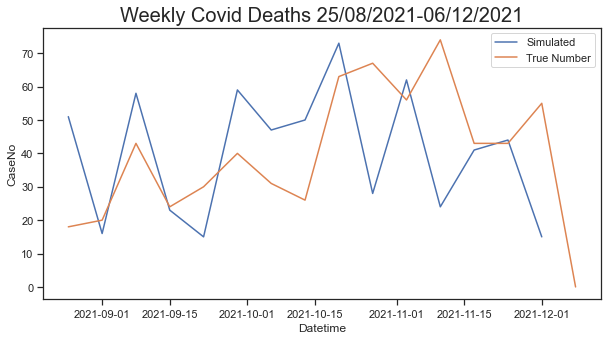

In [29]:
fig= plt.figure(figsize=(10,5))
plt.plot(simdeathsdf, label='Simulated')
plt.plot(weekly_resampled_data, label='True Number')
plt.title('Weekly Covid Deaths 25/08/2021-06/12/2021' ,fontsize=20)
plt.xlabel('Datetime')
plt.ylabel('CaseNo')
plt.legend()
plt.show()

In [30]:
df.columns

Index(['Date', 'ConfirmedCovidCases', 'TotalConfirmedCovidCases',
       'ConfirmedCovidDeaths', 'TotalCovidDeaths', 'CovidCasesConfirmed',
       'HospitalisedCovidCases', 'DailyHosp', 'RequiringICUCovidCases',
       'DailyICU', 'HealthcareWorkersCovidCases', 'DailyHealth', '0-5Hosp',
       'D0-5H', '5-14Hosp', 'D5-14H', '15-24Hosp', 'D15-24H', '25-34Hosp',
       'D25-34H', '35-44Hosp', 'D35-44H', '45-54Hosp', 'D45-54H', '55-64Hosp',
       'D55-64H', '65-74Hosp', 'D65-74H', '75-84Hosp', 'D75-84H', '85upHosp',
       'D85upH', 'DailyH', 'Male', 'Dmale', 'Female', 'Dfemale', 'datetime'],
      dtype='object')

### Lets simulate some data in the case that we have a new variant of concern and its transmissibility rate is 3 times that of the current variant that is in Ireland.


In [31]:
#https://stackoverflow.com/questions/45035929/creating-new-pandas-dataframe-from-certain-columns-of-existing-dataframe
dfVOC = df[['datetime','ConfirmedCovidCases','DailyHosp','DailyHealth','DailyICU' ]]


In [32]:
dfVOC

datetime  ConfirmedCovidCases  DailyHosp  DailyHealth  DailyICU
0   2021-08-23                 1592         21           55         2
1   2021-08-24                 1571         48           65         4
2   2021-08-25                 2051         60           72         6
3   2021-08-26                 1866         50           95         7
4   2021-08-27                 1875         43           80         3
..         ...                  ...        ...          ...       ...
101 2021-12-02                 4163         56           65         1
102 2021-12-03                 5419         48           44         1
103 2021-12-04                 5622         34           21         0
104 2021-12-05                 5156          9            2         1
105 2021-12-06                 2950          6            0         0

[106 rows x 5 columns]

In [33]:
#https://stackoverflow.com/questions/38543263/pandas-multiply-all-the-numeric-values-in-the-data-frame-by-a-constant
dfVOC=dfVOC.select_dtypes(include=[np.number])*3

In [34]:
dfVOC

ConfirmedCovidCases  DailyHosp  DailyHealth  DailyICU
0                   4776         63          165         6
1                   4713        144          195        12
2                   6153        180          216        18
3                   5598        150          285        21
4                   5625        129          240         9
..                   ...        ...          ...       ...
101                12489        168          195         3
102                16257        144          132         3
103                16866        102           63         0
104                15468         27            6         3
105                 8850         18            0         0

[106 rows x 4 columns]

In [35]:
dfVOC.sum()

ConfirmedCovidCases    787722
DailyHosp               14097
DailyHealth             21840
DailyICU                 1413
dtype: int64

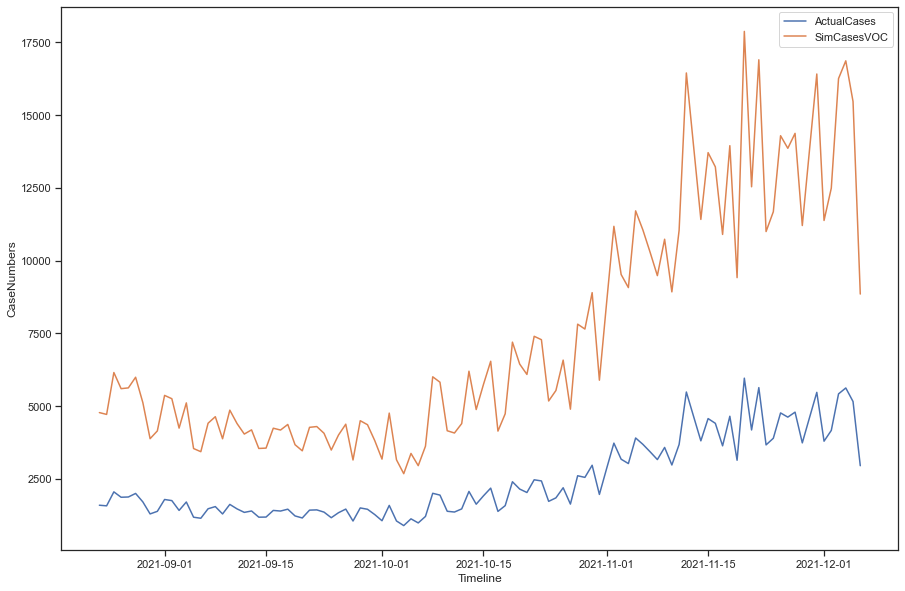

In [36]:
fig= plt.figure(figsize=(15,10))
x = df['datetime']
y = df['ConfirmedCovidCases']
z = dfVOC['ConfirmedCovidCases']

# Plot a simple line chart
plt.plot(x, y, label='ActualCases')

# Plot another line on the same chart/graph
plt.plot(x, z, label = 'SimCasesVOC')

plt.xlabel('Timeline')
plt.ylabel('CaseNumbers')
plt.legend()
plt.show()


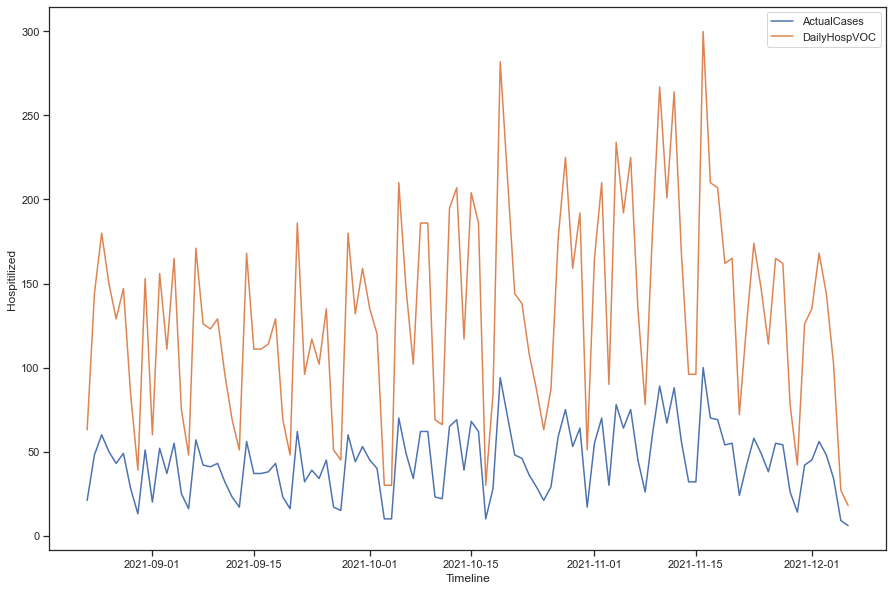

In [37]:
fig= plt.figure(figsize=(15,10))
x = df['datetime']
y = df['DailyHosp']
z = dfVOC['DailyHosp']

# Plot a simple line chart
plt.plot(x, y, label='ActualCases')

# Plot another line on the same chart/graph
plt.plot(x, z, label = 'DailyHospVOC')

plt.xlabel('Timeline')
plt.ylabel('Hospitilized')
plt.legend()
plt.show()


In [38]:
df.tail(10).mean()

ConfirmedCovidCases              4570.7
TotalConfirmedCovidCases       576709.1
ConfirmedCovidDeaths               55.0
TotalCovidDeaths                 5685.0
CovidCasesConfirmed            572087.0
HospitalisedCovidCases          20632.4
DailyHosp                          33.4
RequiringICUCovidCases           2205.7
DailyICU                            1.1
HealthcareWorkersCovidCases     38454.9
DailyHealth                        38.5
0-5Hosp                           411.2
D0-5H                               1.7
5-14Hosp                          301.6
D5-14H                              1.2
15-24Hosp                        1024.1
D15-24H                             2.6
25-34Hosp                        1594.6
D25-34H                             2.2
35-44Hosp                        1885.0
D35-44H                             4.9
45-54Hosp                        2387.0
D45-54H                             4.1
55-64Hosp                        2789.8
D55-64H                             4.1


In [39]:
dfVOC.tail(10).mean()

ConfirmedCovidCases    13712.1
DailyHosp                100.2
DailyHealth              115.5
DailyICU                   3.3
dtype: float64

In [40]:
dfVOC.head(10).mean()

ConfirmedCovidCases    5136.6
DailyHosp               114.9
DailyHealth             203.4
DailyICU                 11.4
dtype: float64

In [41]:
df.corr()

ConfirmedCovidCases  TotalConfirmedCovidCases  \
ConfirmedCovidCases                     1.000000                  0.884279   
TotalConfirmedCovidCases                0.884279                  1.000000   
ConfirmedCovidDeaths                    0.423920                  0.580035   
TotalCovidDeaths                        0.876169                  0.983571   
CovidCasesConfirmed                     0.878176                  0.999856   
HospitalisedCovidCases                  0.859175                  0.980293   
DailyHosp                               0.268469                  0.119733   
RequiringICUCovidCases                  0.859149                  0.976702   
DailyICU                                0.091470                 -0.074308   
HealthcareWorkersCovidCases             0.870075                  0.978741   
DailyHealth                             0.179802                 -0.006894   
0-5Hosp                                 0.830214                  0.973326   
D0-5H                                   0.137555                  0.068794   
5-14Hosp                                0.820785                  0.972243   
D5-14H                                  0.061712                  0.053998   
15-24Hosp                               0.814170                  0.958711   
D15-24H                                -0.006094                 -0.092823   
25-34Hosp                               0.847276                  0.976762   
D25-34H                                 0.169771                  0.015692   
35-44Hosp                               0.856830                  0.984260   
D35-44H                                 0.345156                  0.227222   
45-54Hosp                               0.853206                  0.978358   
D45-54H                                 0.191992                  0.079965   
55-64Hosp                               0.871925                  0.990236   
D55-64H                                 0.345041                  0.247629   
65-74Hosp                               0.873683                  0.985467   
D65-74H                                 0.306894                  0.164207   
75-84Hosp                               0.867593                  0.979484   
D75-84H                                 0.184423                  0.097174   
85upHosp                                0.846495                  0.958056   
D85upH                                 -0.116545                 -0.198990   
DailyH                                  0.268469                  0.119733   
Male                                    0.877700                  0.999843   
Dmale                                   0.975110                  0.867525   
Female                                  0.878558                  0.999856   
Dfemale                                 0.971454                  0.867038   

                             ConfirmedCovidDeaths  TotalCovidDeaths  \
ConfirmedCovidCases                      0.423920          0.876169   
TotalConfirmedCovidCases                 0.580035          0.983571   
ConfirmedCovidDeaths                     1.000000          0.678072   
TotalCovidDeaths                         0.678072          1.000000   
CovidCasesConfirmed                      0.584994          0.983902   
HospitalisedCovidCases                   0.663033          0.995223   
DailyHosp                                0.472740          0.196816   
RequiringICUCovidCases                   0.659702          0.994634   
DailyICU                                 0.146343          0.008160   
HealthcareWorkersCovidCases              0.672184          0.996056   
DailyHealth                              0.265570          0.114470   
0-5Hosp                                  0.677515          0.988439   
D0-5H                                   -0.022753          0.049074   
5-14Hosp                                 0.664213          0.984667   
D5-14H                                   0.028312          0.044263   
15-24H

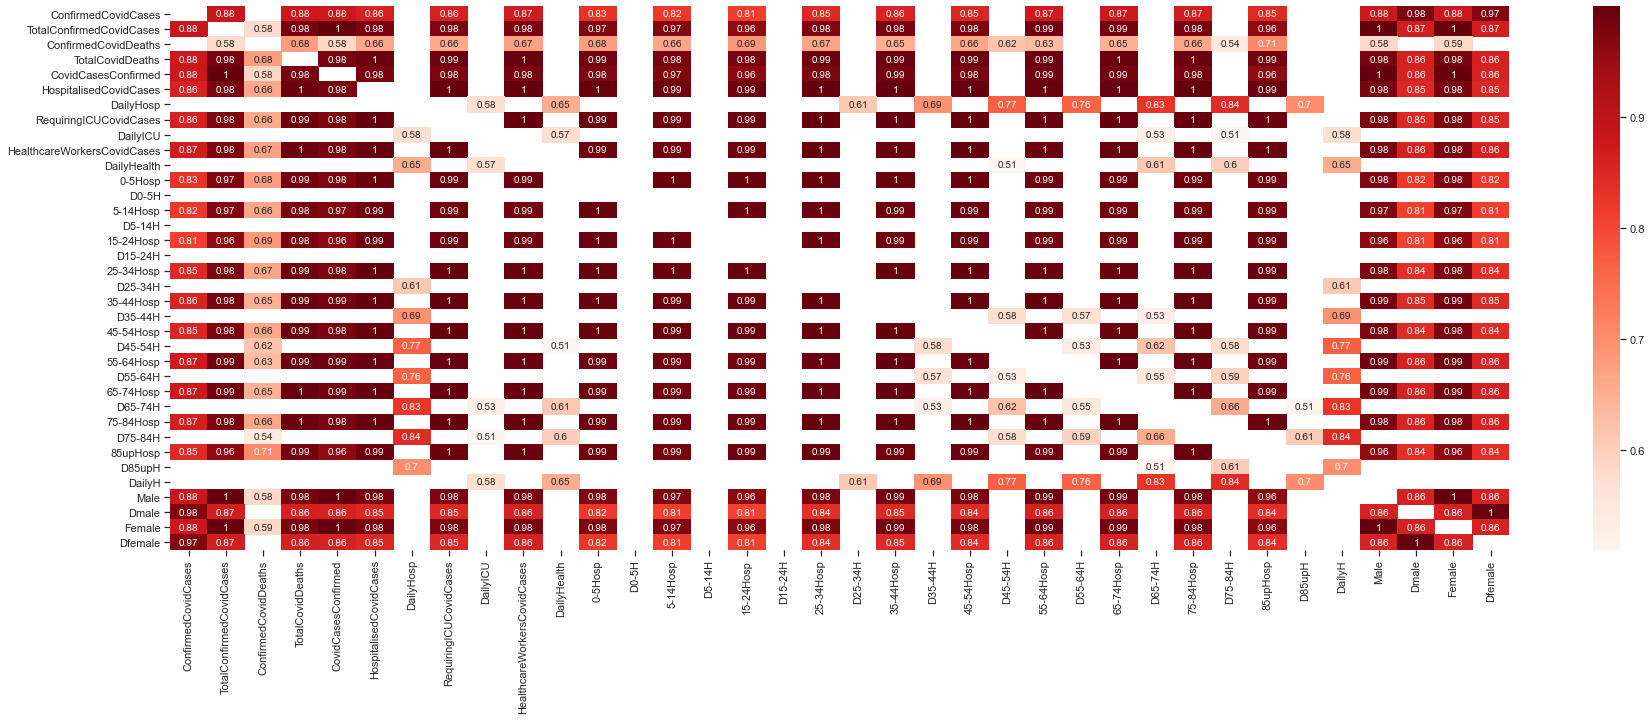

In [42]:
# code adapted from https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
#Created, Filtered and Charted to see on a map what are the highest correlated variables in our Covid Dataset
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

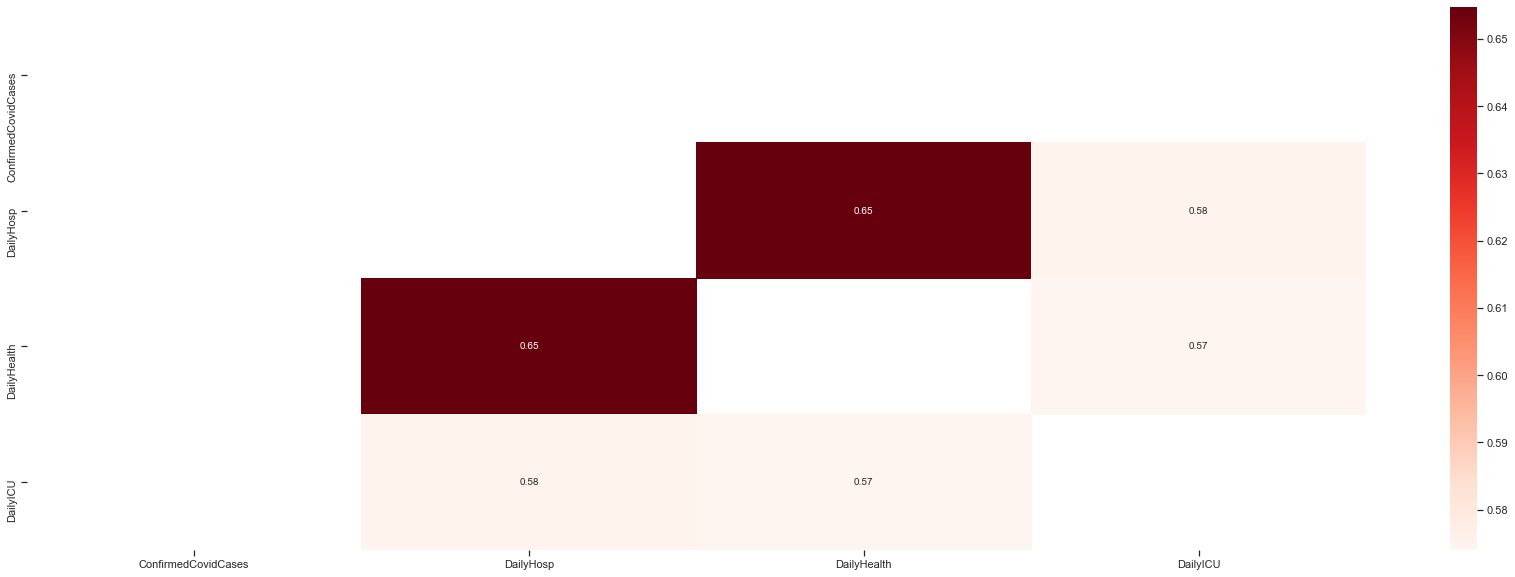

In [43]:
dfCorr = dfVOC.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

### ICU Hopitilization and Simulated Data

***


*'Current capacity is 286, with the system being able to scale up to 350 using surge capacity. But here’s an even smaller number: six. That’s the number of ICU beds per 100,000 inhabitants in Ireland, which compares unfavourably to the European average of 11.5.'Current capacity is 286, with the system being able to scale up to 350 using surge capacity. But here’s an even smaller number: six. That’s the number of ICU beds per 100,000 inhabitants in Ireland, which compares unfavourably to the European average of 11.5.“In Ireland, we have a fairly low ratio of ICU beds per 100,000 of the population,” says Professor Curley plainly. “And for a long time, it has been noted by the ICU community that this is inadequate to provide critical care.”That low number means that, even before the pandemic, ICUs in Ireland were operating at 90 per cent capacity. “A system that acts at 90 per cent capacity doesn’t allow for an extra thing,” Professor Curley says. “People think it’s OK if you’re not at 100 per cent. No, it’s not; your occupancy should be at 75 per cent. That allows you to admit that head injury or the patient with meningitis or sepsis or respiratory failure.”*

This segment was taken from an article in an Irish magazine called the gloss. The article was posted online [in 2020](https://thegloss.ie/the-critical-count-how-many-icu-beds-does-ireland-actually-have/#:~:text=Current%20capacity%20is%20286%2C%20with%20the%20system%20being,compares%20unfavourably%20to%20the%20European%20average%20of%2011.5.). As we know since then our country has entered a fourth wave with numbers increasing as can be seen in the dataset downloaded. Lets look at the current ICU occupancy and see what some pseudorandom data generated will look like with the current numbers as our basis.


 Lets look at the current trend in our dataset as the current case number increases so does our ICU admissions. One thing this dataset does not include is discharges from ICU. So the number is continually increasing but we don't have figures from this specific dataset to tell us how many are discharged daily. This would be a very useful tool in looking at capcity and the overall trend of how long patients are staying in ICU with Covid.
 
The first plot we can look at from the dataset is a relationship plot which will tell is the relationship between the total confirmed cases and the hospitilized cases. These are total cases from the beginning of the pandemic so they appear large. We will use a current number of cases versus hospitilizations to get a current view of whats happening also.

ref: https://covid19ireland-geohive.hub.arcgis.com/pages/hospitals-icu--testing

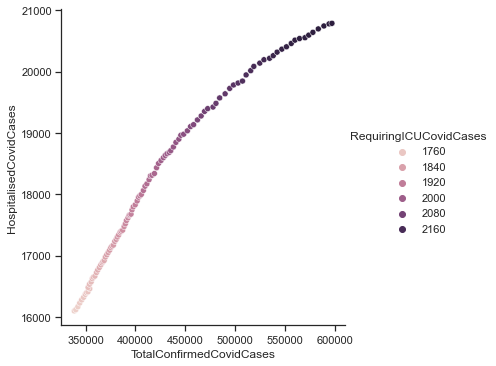

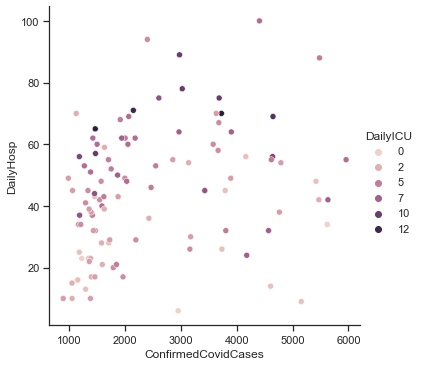

In [44]:
sns.relplot(x='TotalConfirmedCovidCases', y= 'HospitalisedCovidCases', hue='RequiringICUCovidCases',data=df)
sns.relplot(x='ConfirmedCovidCases', y= 'DailyHosp',hue='DailyICU', data=df)

In [45]:
df.DailyICU.mean()

4.443396226415095

In [46]:
df.ConfirmedCovidDeaths.sum()

633.0

In [47]:
df.DailyICU.mean()

4.443396226415095

In [48]:
# The mean here is per week wheras the mean in the ICU admission is daily. I divided the mean by 7 here to look at daily deaths over my dataset time period.
df.ConfirmedCovidDeaths.mean()/7

6.028571428571429

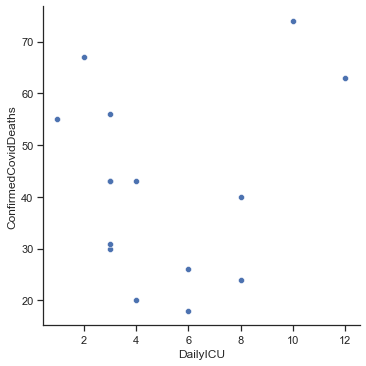

In [49]:
sns.relplot(x='DailyICU', y= 'ConfirmedCovidDeaths',data=df)

Lets simulate some data for the ICU cases being admitted. So our current dataset mean for daily ICU admissions is 4.44. We'll use numpy random poisson to stimulate some data with the current trend from our dataset


In [50]:
# we will simulate some dates using datetime
simICUD=pd.date_range('23/08/2021', periods=106, freq='D')

In [51]:
ts= pd.DataFrame(np.random.poisson(4.4,len(simICUD)), index=simICUD, columns=['SimulatedICUCases'])

In [52]:
ts.describe()

SimulatedICUCases
count         106.000000
mean            4.103774
std             2.092751
min             0.000000
25%             3.000000
50%             4.000000
75%             5.000000
max            10.000000

In [53]:
%matplotlib inline
#plt.text(60, .025, r'$\mu=4.4,\ \sigma=2.3$')
plt.xlabel('ICU Admissions')
plt.ylabel('Probability')
plt.title('Histogram of Simulated ICU Covid Cases Daily ')
plt.hist(ts,15, density=True, facecolor='g')
plt.show()

We can see how many people are currently being discharged from ICU in Ireland daily from the database provided publicly [here](https://covid-19.geohive.ie/datasets/c8208a0a8ff04a45b2922ae69e9b2206_0/explore?showTable=true)

In [54]:
dfICU = pd.read_csv('Covid ICU Data.txt', sep = '\t' ,nrows=107)

In [55]:
dfICU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Daily Extract    107 non-null    object 
 1   nCovidConf       106 non-null    float64
 2   nDischCovidConf  107 non-null    int64  
 3   nAdmitCovidConf  107 non-null    int64  
 4   Unnamed: 4       0 non-null      float64
dtypes: float64(2), int64(2), object(1)
memory usage: 4.3+ KB


In [56]:
dfICU.drop(dfICU.columns[[4]], axis=1, inplace=True) 

In [57]:
dfICU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Daily Extract    107 non-null    object 
 1   nCovidConf       106 non-null    float64
 2   nDischCovidConf  107 non-null    int64  
 3   nAdmitCovidConf  107 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.5+ KB


In [58]:
pd.to_datetime(dfICU['Daily Extract'])

0     2021-08-23
1     2021-08-24
2     2021-08-25
3     2021-08-26
4     2021-08-27
         ...    
102   2021-12-03
103   2021-12-04
104   2021-12-05
105   2021-12-06
106   2021-12-07
Name: Daily Extract, Length: 107, dtype: datetime64[ns]

In [59]:
dfICU['datetime'] = pd.to_datetime(dfICU['Daily Extract'],dayfirst=True)

In [60]:
dfICU['datetime']

0     2021-08-23
1     2021-08-24
2     2021-08-25
3     2021-08-26
4     2021-08-27
         ...    
102   2021-03-12
103   2021-04-12
104   2021-05-12
105   2021-06-12
106   2021-07-12
Name: datetime, Length: 107, dtype: datetime64[ns]

In [61]:
dfICU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Daily Extract    107 non-null    object        
 1   nCovidConf       106 non-null    float64       
 2   nDischCovidConf  107 non-null    int64         
 3   nAdmitCovidConf  107 non-null    int64         
 4   datetime         107 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.3+ KB


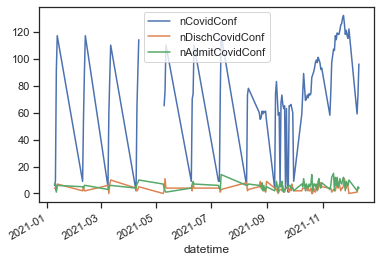

In [62]:
#https://datascienceparichay.com/article/line-plot-from-pandas-dataframe/
ax = dfICU.plot.line(x='datetime')

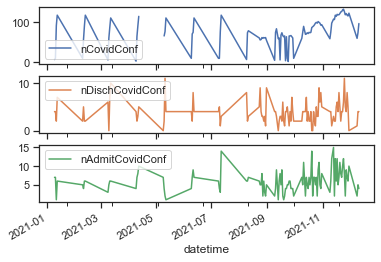

In [63]:
ax = dfICU.plot.line(x='datetime', subplots=True)

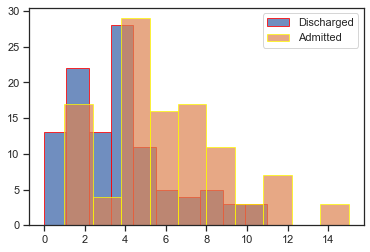

In [64]:
#https://www.geeksforgeeks.org/how-to-plot-two-histograms-together-in-matplotlib/
series1 = dfICU['nDischCovidConf']
series2 = dfICU['nAdmitCovidConf']
series3 = weekly_resampled_data
  
# plotting first histogram
plt.hist(series1, label='Discharged', alpha=.8, edgecolor='red')
  
# plotting second histogram
plt.hist(series2, label='Admitted', alpha=0.7, edgecolor='yellow')


plt.legend()
  
# Showing the plot using plt.show()
plt.show()

(array([0.0990566 , 0.23113208, 0.        , 0.36320755, 0.        ,
        0.46226415, 0.        , 0.19811321, 0.16509434, 0.        ,
        0.0990566 , 0.        , 0.0990566 , 0.03301887]),
 array([1.        , 1.57142857, 2.14285714, 2.71428571, 3.28571429,
        3.85714286, 4.42857143, 5.        , 5.57142857, 6.14285714,
        6.71428571, 7.28571429, 7.85714286, 8.42857143, 9.        ]),
 <BarContainer object of 14 artists>)

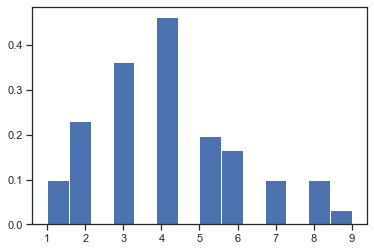

In [65]:
x = np.random.poisson(4.4, 106)

plt.hist(x,14, density=True)

In [66]:
#https://aceyourgrace.medium.com/eda-covid-19-medium-97d48db61119

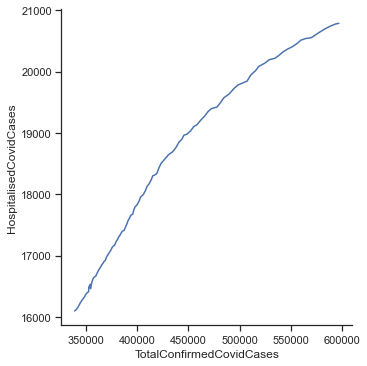

In [67]:
sns.relplot(x='TotalConfirmedCovidCases', y= 'HospitalisedCovidCases',  kind='line',data=df)

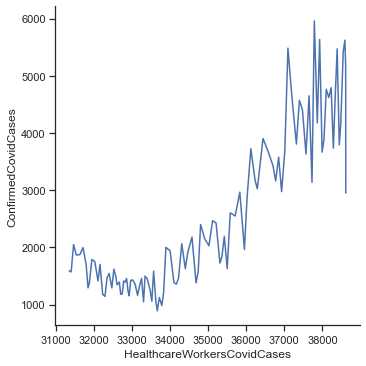

In [68]:
sns.relplot(x='HealthcareWorkersCovidCases', y= 'ConfirmedCovidCases',  kind='line',data=df)

In [69]:
df.columns

Index(['Date', 'ConfirmedCovidCases', 'TotalConfirmedCovidCases',
       'ConfirmedCovidDeaths', 'TotalCovidDeaths', 'CovidCasesConfirmed',
       'HospitalisedCovidCases', 'DailyHosp', 'RequiringICUCovidCases',
       'DailyICU', 'HealthcareWorkersCovidCases', 'DailyHealth', '0-5Hosp',
       'D0-5H', '5-14Hosp', 'D5-14H', '15-24Hosp', 'D15-24H', '25-34Hosp',
       'D25-34H', '35-44Hosp', 'D35-44H', '45-54Hosp', 'D45-54H', '55-64Hosp',
       'D55-64H', '65-74Hosp', 'D65-74H', '75-84Hosp', 'D75-84H', '85upHosp',
       'D85upH', 'DailyH', 'Male', 'Dmale', 'Female', 'Dfemale', 'datetime'],
      dtype='object')

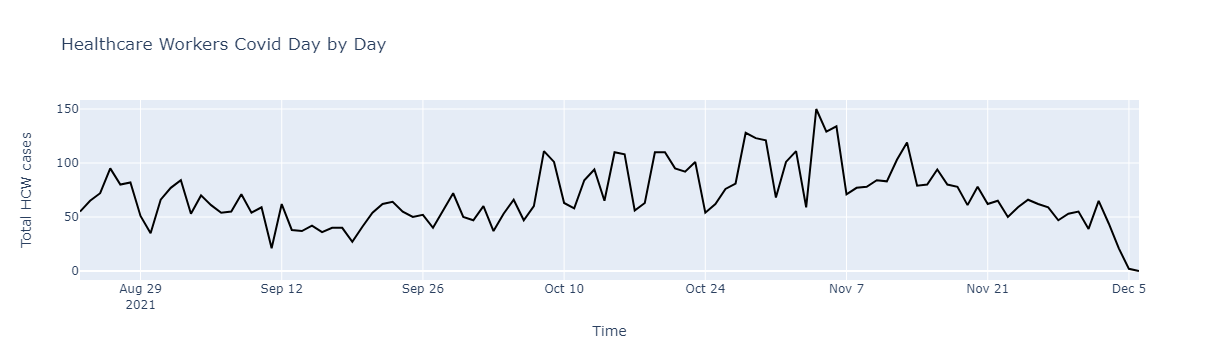

In [70]:
import plotly
import plotly.express as px
import plotly.graph_objs as go

fig = go.Figure(data=go.Scatter(x=df['datetime'].astype(dtype=str), 
                                y=df['DailyHealth'],
                                marker_color='black', text="counts"))
fig.update_layout({"title": 'Healthcare Workers Covid Day by Day',
                   "xaxis": {"title":"Time"},
                   "yaxis": {"title":"Total HCW cases"},
                   "showlegend": False})
fig.show()

In [71]:
x=df['ConfirmedCovidCases']

In [72]:
x.sum()

262574

In [73]:
x.describe()

count     106.000000
mean     2477.113208
std      1363.239973
min       892.000000
25%      1413.250000
50%      1894.500000
75%      3619.250000
max      5959.000000
Name: ConfirmedCovidCases, dtype: float64

<AxesSubplot:xlabel='datetime', ylabel='ConfirmedCovidCases'>

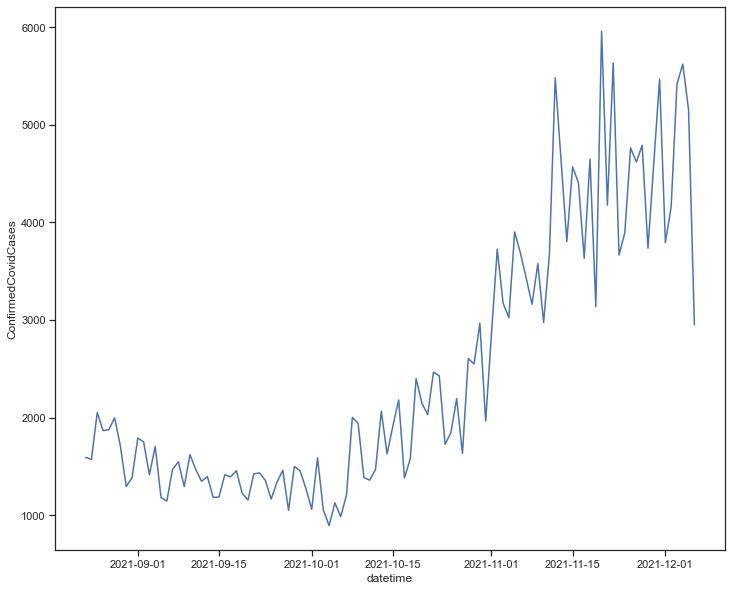

In [74]:
fig= plt.figure(figsize=(12,10))
sns.lineplot(x='datetime',y='ConfirmedCovidCases',data=df)

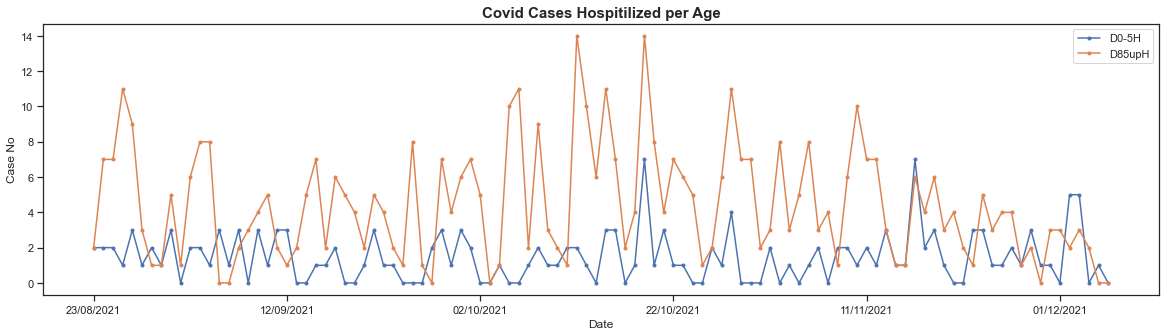

In [75]:
plt.figure(figsize=(20,5))
plt.title('Covid Cases Hospitilized per Age',fontdict={'fontweight': 'bold', 'fontsize': 15})
ages_to_look_at =['D0-5H','D85upH']
for age in df:
    if age in ages_to_look_at:
        plt.plot(df.Date, df[age], marker = '.', label=age)
plt.xlabel('Date')
plt.ylabel('Case No')
plt.xticks(df.Date[::20]) # only want every two years as the figure will be too squashed if we do every year
plt.legend()       
plt.show()


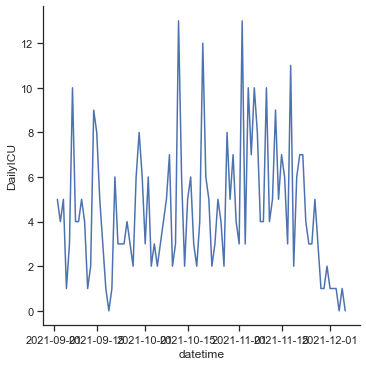

In [76]:
sns.relplot(x="datetime", y="DailyICU", ci=None, kind="line", data=df[10:]);


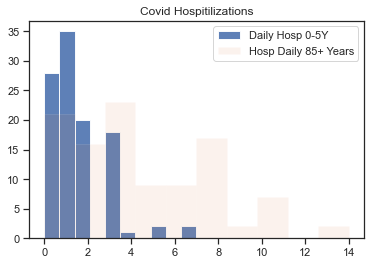

In [77]:
plt.hist(df['D0-5H'], 
         alpha=0.9,
         label='Daily Hosp 0-5Y')
  
plt.hist(df['D85upH'],
         alpha=0.1,
         label='Hosp Daily 85+ Years')
  
plt.legend(loc='upper right')
plt.title('Covid Hospitilizations')
plt.show()

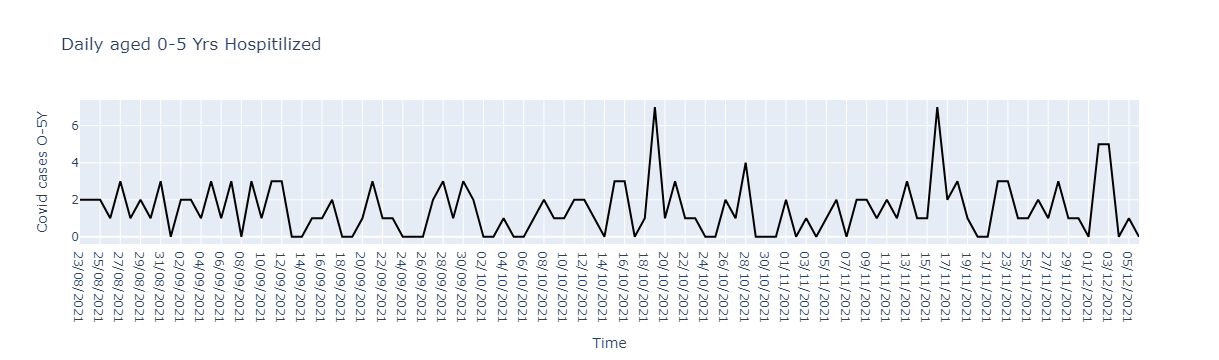

In [78]:
import plotly
import plotly.express as px
import plotly.graph_objs as go

fig = go.Figure(data=go.Scatter(x=df['Date'].astype(dtype=str), 
                                y=df['D0-5H'],
                                marker_color='black', text="counts"))
fig.update_layout({"title": 'Daily aged 0-5 Yrs Hospitilized',
                   "xaxis": {"title":"Time"},
                   "yaxis": {"title":"Covid cases O-5Y"},
                   "showlegend": False})
fig.show()

In [79]:
df.columns

Index(['Date', 'ConfirmedCovidCases', 'TotalConfirmedCovidCases',
       'ConfirmedCovidDeaths', 'TotalCovidDeaths', 'CovidCasesConfirmed',
       'HospitalisedCovidCases', 'DailyHosp', 'RequiringICUCovidCases',
       'DailyICU', 'HealthcareWorkersCovidCases', 'DailyHealth', '0-5Hosp',
       'D0-5H', '5-14Hosp', 'D5-14H', '15-24Hosp', 'D15-24H', '25-34Hosp',
       'D25-34H', '35-44Hosp', 'D35-44H', '45-54Hosp', 'D45-54H', '55-64Hosp',
       'D55-64H', '65-74Hosp', 'D65-74H', '75-84Hosp', 'D75-84H', '85upHosp',
       'D85upH', 'DailyH', 'Male', 'Dmale', 'Female', 'Dfemale', 'datetime'],
      dtype='object')

In [80]:
#https://www.bing.com/videos/search?q=ANALYSING+COVID+DATASETS+IN+PYTHON&&view=detail&mid=4D307159A001BFB797654D307159A001BFB79765&&FORM=VRDGAR&ru=%2Fvideos%2Fsearch%3Fq%3DANALYSING%2BCOVID%2BDATASETS%2BIN%2BPYTHON%26FORM%3DHDRSC4
cases = df[['ConfirmedCovidCases','DailyICU','DailyHosp']].loc[71]
cases_df=pd.DataFrame(cases).reset_index()
cases_df.columns=['Type', 'Total']
cases_df['Percentage']=np.round(100*cases_df['Total']/np.sum(cases_df['Total']),2)

cases_df['Condition']= ['SARS-CoV-2' for i in range(len(cases_df))]

In [81]:
cases_df

Type  Total  Percentage   Condition
0  ConfirmedCovidCases   3726       97.82  SARS-CoV-2
1             DailyICU     13        0.34  SARS-CoV-2
2            DailyHosp     70        1.84  SARS-CoV-2

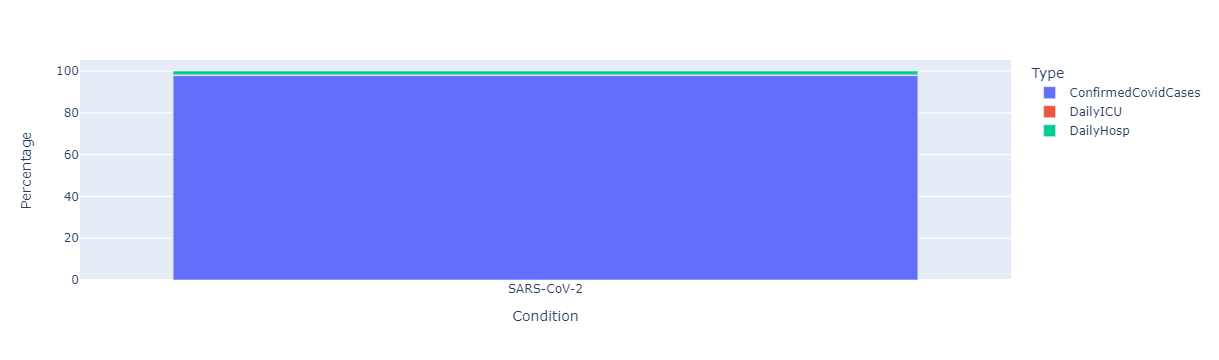

In [82]:
fig=px.bar(cases_df, x='Condition',y='Percentage',color='Type',hover_data=['Total'])
fig.show()
# Because the number of people going into ICU is such a low percentage we can't see it on the 

In [83]:
df.columns

Index(['Date', 'ConfirmedCovidCases', 'TotalConfirmedCovidCases',
       'ConfirmedCovidDeaths', 'TotalCovidDeaths', 'CovidCasesConfirmed',
       'HospitalisedCovidCases', 'DailyHosp', 'RequiringICUCovidCases',
       'DailyICU', 'HealthcareWorkersCovidCases', 'DailyHealth', '0-5Hosp',
       'D0-5H', '5-14Hosp', 'D5-14H', '15-24Hosp', 'D15-24H', '25-34Hosp',
       'D25-34H', '35-44Hosp', 'D35-44H', '45-54Hosp', 'D45-54H', '55-64Hosp',
       'D55-64H', '65-74Hosp', 'D65-74H', '75-84Hosp', 'D75-84H', '85upHosp',
       'D85upH', 'DailyH', 'Male', 'Dmale', 'Female', 'Dfemale', 'datetime'],
      dtype='object')

In [84]:
hosp = df[['D0-5H','D5-14H','D15-24H','D25-34H','D35-44H','D45-54H','D55-64H','D65-74H','D75-84H','D85upH']].loc[85]
hosp_df=pd.DataFrame(hosp).reset_index()
hosp_df.columns=['Age', 'Total']
hosp_df['Percentage']=np.round(100*hosp_df['Total']/np.sum(hosp_df['Total']),2)
hosp_df['Condition']= ['SARS-CoV-2' for i in range(len(hosp_df))]
hosp_df

Age  Total  Percentage   Condition
0    D0-5H      7         7.0  SARS-CoV-2
1   D5-14H      4         4.0  SARS-CoV-2
2  D15-24H      4         4.0  SARS-CoV-2
3  D25-34H      7         7.0  SARS-CoV-2
4  D35-44H     11        11.0  SARS-CoV-2
5  D45-54H     10        10.0  SARS-CoV-2
6  D55-64H     17        17.0  SARS-CoV-2
7  D65-74H     21        21.0  SARS-CoV-2
8  D75-84H     13        13.0  SARS-CoV-2
9   D85upH      6         6.0  SARS-CoV-2

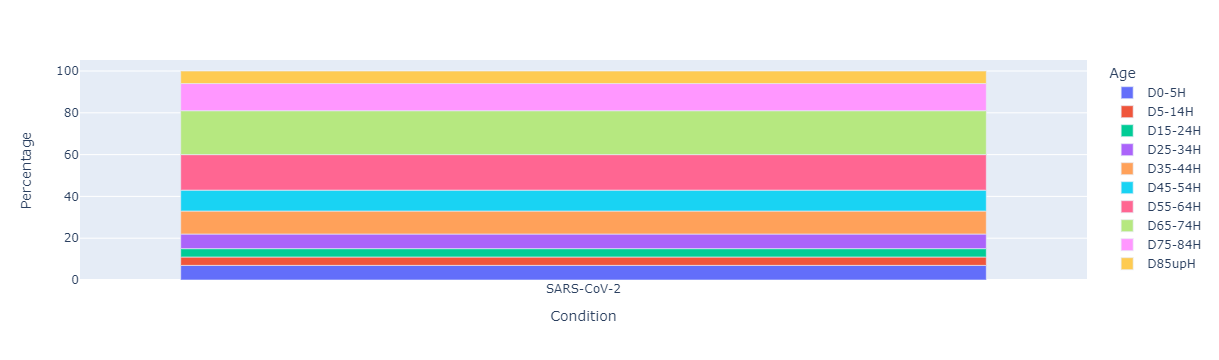

In [85]:
fig=px.bar(hosp_df, x='Condition',y='Percentage',color='Age',hover_data=['Total'])
fig.show()
# 

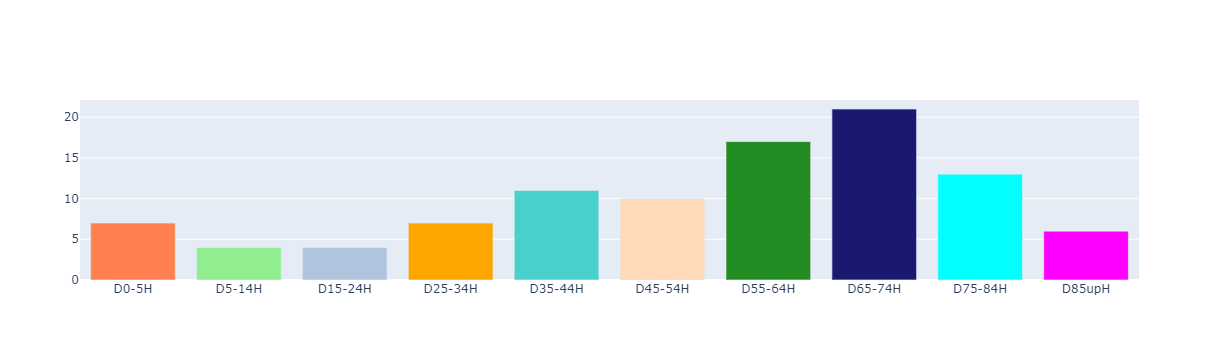

In [86]:
per = np.round(df[['D0-5H','D5-14H','D15-24H','D25-34H','D35-44H','D45-54H','D55-64H','D65-74H','D75-84H','D85upH']].loc[85], 2)

per_df= pd.DataFrame(per)
per_df.columns=['Percentage']

fig = go.Figure()
fig.add_trace(go.Bar(x=per_df.index, y = per_df['Percentage'], marker_color=['coral','lightgreen', 'lightsteelblue', 'orange', 'mediumturquoise', 'peachpuff', 'forestgreen', 'midnightblue', 'cyan','magenta']))
fig.show()

# getting a TypeError: 'module' object is not callable and can't find the root. the bar was written without the capital B and once corrected the plot worked.



In [87]:
hosp_df['Percentage']

0     7.0
1     4.0
2     4.0
3     7.0
4    11.0
5    10.0
6    17.0
7    21.0
8    13.0
9     6.0
Name: Percentage, dtype: float64

Lets simulate some date based on the percentages above 


In [88]:
rng= default_rng(12345)
# defining age groups
age_groups = (['0-5','5-14','15-24','25-34','35-44','45-54','55-64','65-74','75-84','85+'])

# using numpy.choice to create 100data points with a probability for each based on current statistics
ages = rng.choice(age_groups, 100, p=[0.07,0.04,0.04, 0.07, 0.11, 0.10,0.17,0.21,0.13,0.06])

# creating the dataframe
simdata = pd.DataFrame(data=ages, columns=["Age Groups"])
simdata

Age Groups
0       35-44
1       35-44
2       65-74
3       65-74
4       45-54
..        ...
95      45-54
96      35-44
97        85+
98        0-5
99      45-54

[100 rows x 1 columns]

In [89]:
#https://covid19.healthdata.org/ireland?view=social-distancing&tab=trend
##https://moonbooks.org/Articles/How-to-sum-multiple-columns-together-of-a-dataframe-with-pandas-in-python-/